Import Some Important Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Read Data

In [2]:
Data_path ='D://ML_dataset//NN_project//Signs//ASL_Dataset//Train//'
Pred_path ='D://ML_dataset//NN_project//Signs//ASL_Dataset//Prediction//'

Preprocessing

train_test

In [3]:
for folder in  os.listdir(Data_path ) : 
    files = gb.glob(pathname= str( Data_path + folder + '/*'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 5996 in folder A
For training data , found 5996 in folder B
For training data , found 5996 in folder C
For training data , found 5996 in folder D
For training data , found 5996 in folder E
For training data , found 5996 in folder F
For training data , found 5996 in folder G
For training data , found 5996 in folder H
For training data , found 5996 in folder I
For training data , found 5996 in folder J
For training data , found 5996 in folder K
For training data , found 5996 in folder L
For training data , found 5996 in folder M
For training data , found 5996 in folder N
For training data , found 5996 in folder Nothing
For training data , found 5996 in folder O
For training data , found 5996 in folder P
For training data , found 5996 in folder Q
For training data , found 5966 in folder R
For training data , found 5996 in folder S
For training data , found 5886 in folder Space
For training data , found 5648 in folder T
For training data , found 4542 in folder U
F

In [4]:
code = {'A':0 ,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'Nothing':14,'O':15,'P':16,'Q':17,'R':18,'S':19,'Space':20,'T':21,'U':22,'V':23,'W':24,'X':25,'Y':26,'Z':27}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [5]:
img_size =64

In [7]:
X_Data = []
y_Data = []
for folder in  tqdm(os.listdir(Data_path )) : 
    files = gb.glob(pathname= str( Data_path + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (img_size,img_size))
        X_Data.append(list(image_array))
        y_Data.append(code[folder])

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [19:31<00:00, 41.84s/it]


In [8]:
print(f'we have {len(X_Data)} items in X_Data')

we have 165670 items in X_Data


prediction

In [9]:
for folder in  os.listdir(Pred_path ) : 
    files = gb.glob(pathname= str( Pred_path + folder + '/*'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 4 in folder A
For testing data , found 4 in folder B
For testing data , found 4 in folder C
For testing data , found 4 in folder D
For testing data , found 4 in folder E
For testing data , found 4 in folder F
For testing data , found 4 in folder G
For testing data , found 4 in folder H
For testing data , found 4 in folder I
For testing data , found 4 in folder J
For testing data , found 4 in folder K
For testing data , found 4 in folder L
For testing data , found 4 in folder M
For testing data , found 4 in folder N
For testing data , found 4 in folder Nothing
For testing data , found 4 in folder O
For testing data , found 4 in folder P
For testing data , found 4 in folder Q
For testing data , found 4 in folder R
For testing data , found 4 in folder S
For testing data , found 4 in folder Space
For testing data , found 4 in folder T
For testing data , found 4 in folder U
For testing data , found 4 in folder V
For testing data , found 4 in folder W
For testing dat

In [44]:
size =[]

for folder in  tqdm(os.listdir(Pred_path )) : 
    files = gb.glob(pathname= str( Pred_path +folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        size.append(image.shape)


pd.Series(size).value_counts()

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 32.51it/s]


(400, 400, 3)    112
Name: count, dtype: int64

In [10]:
X_Pred = []
y_Pred = []
for folder in  tqdm(os.listdir(Pred_path )) : 
    files = gb.glob(pathname= str( Pred_path +folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (img_size,img_size))
        X_Pred.append(list(image_array))
        y_Pred.append(code[folder])


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 15.05it/s]


In [11]:
print(f'we have {len(X_Pred)} items in X_Pred')

we have 112 items in X_Pred


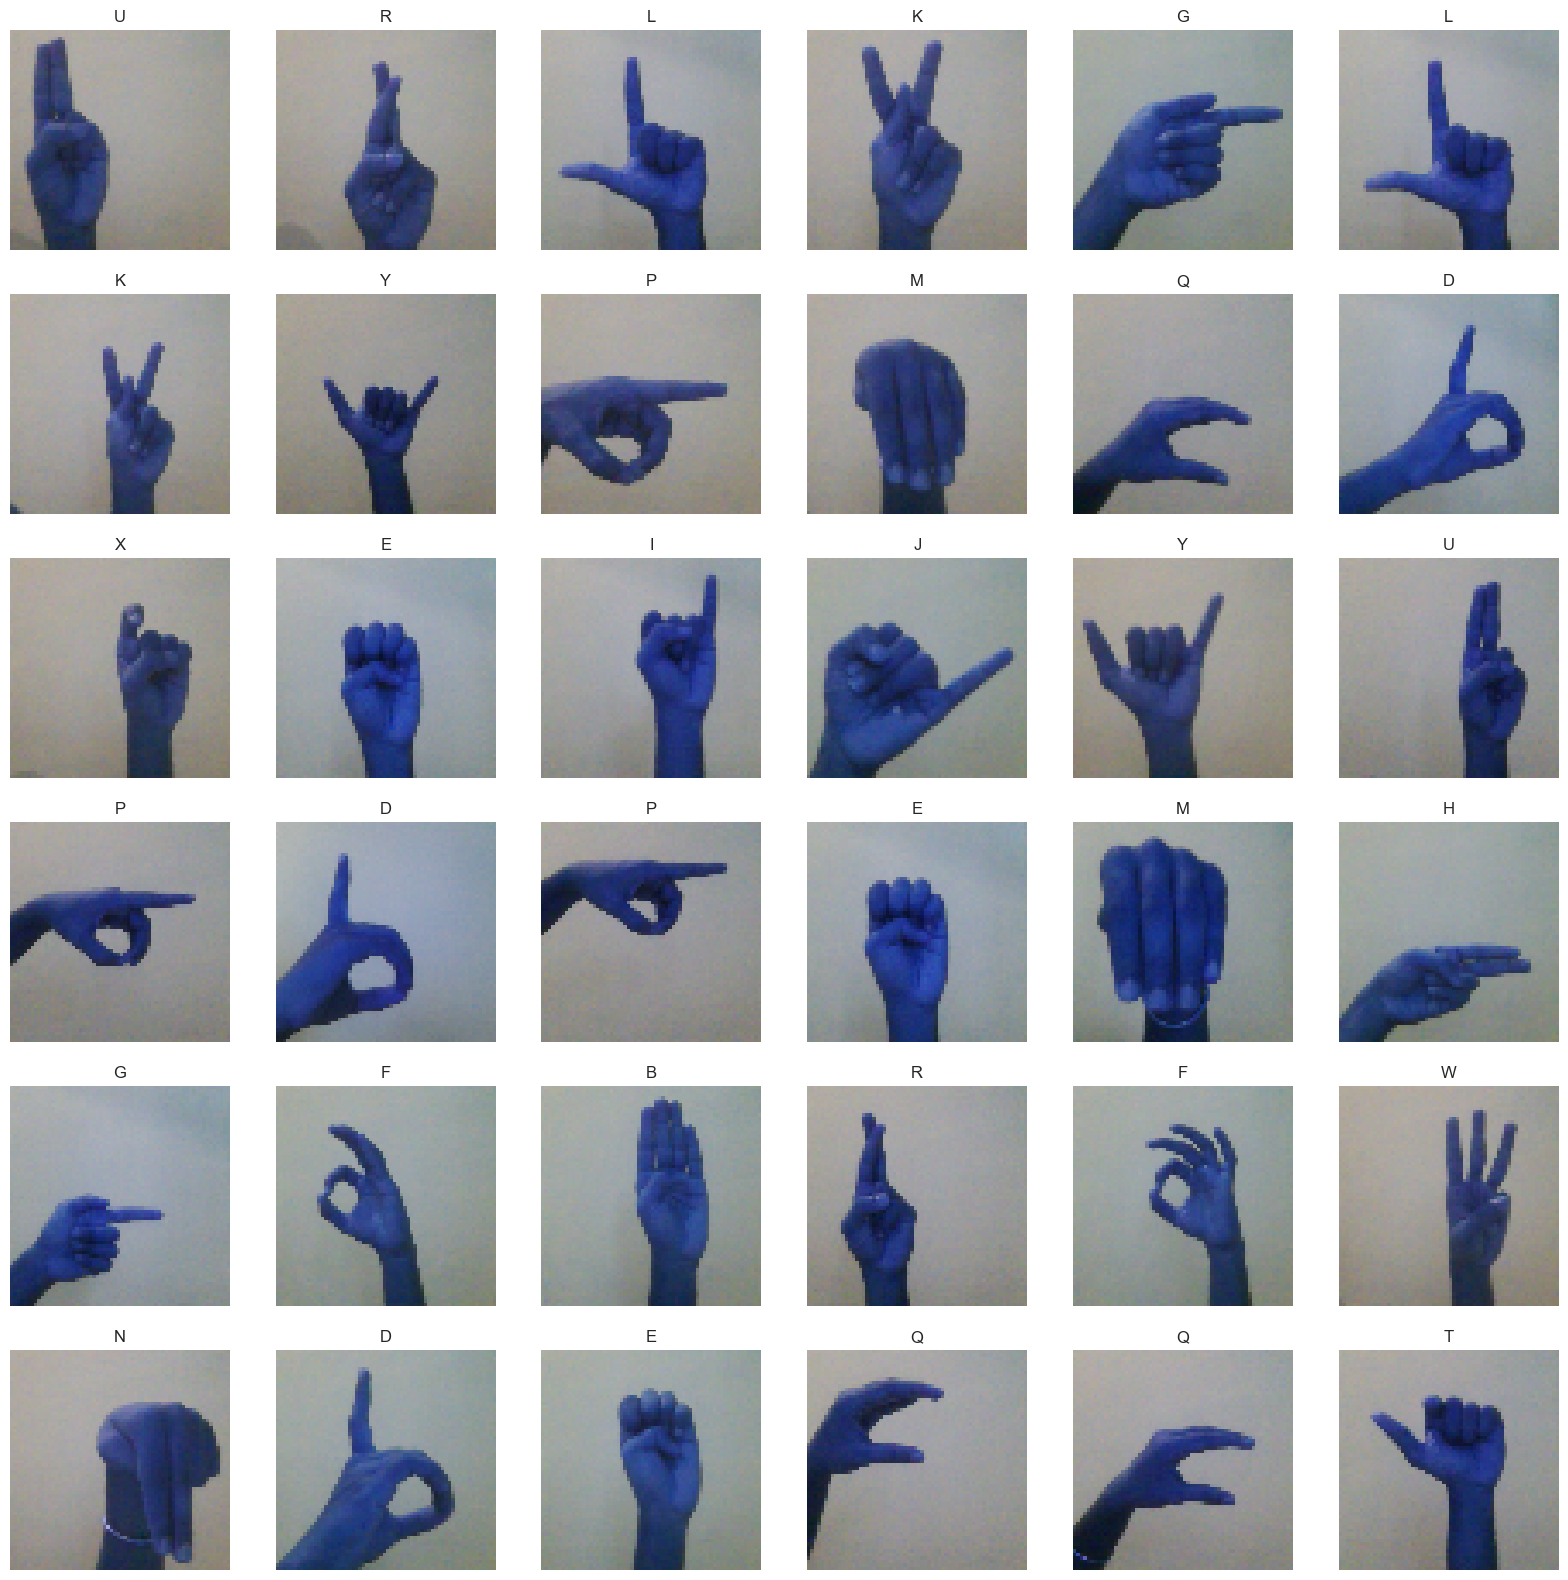

In [12]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Data),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Data[i])   
    plt.axis('off')
    plt.title(getcode(y_Data[i]))

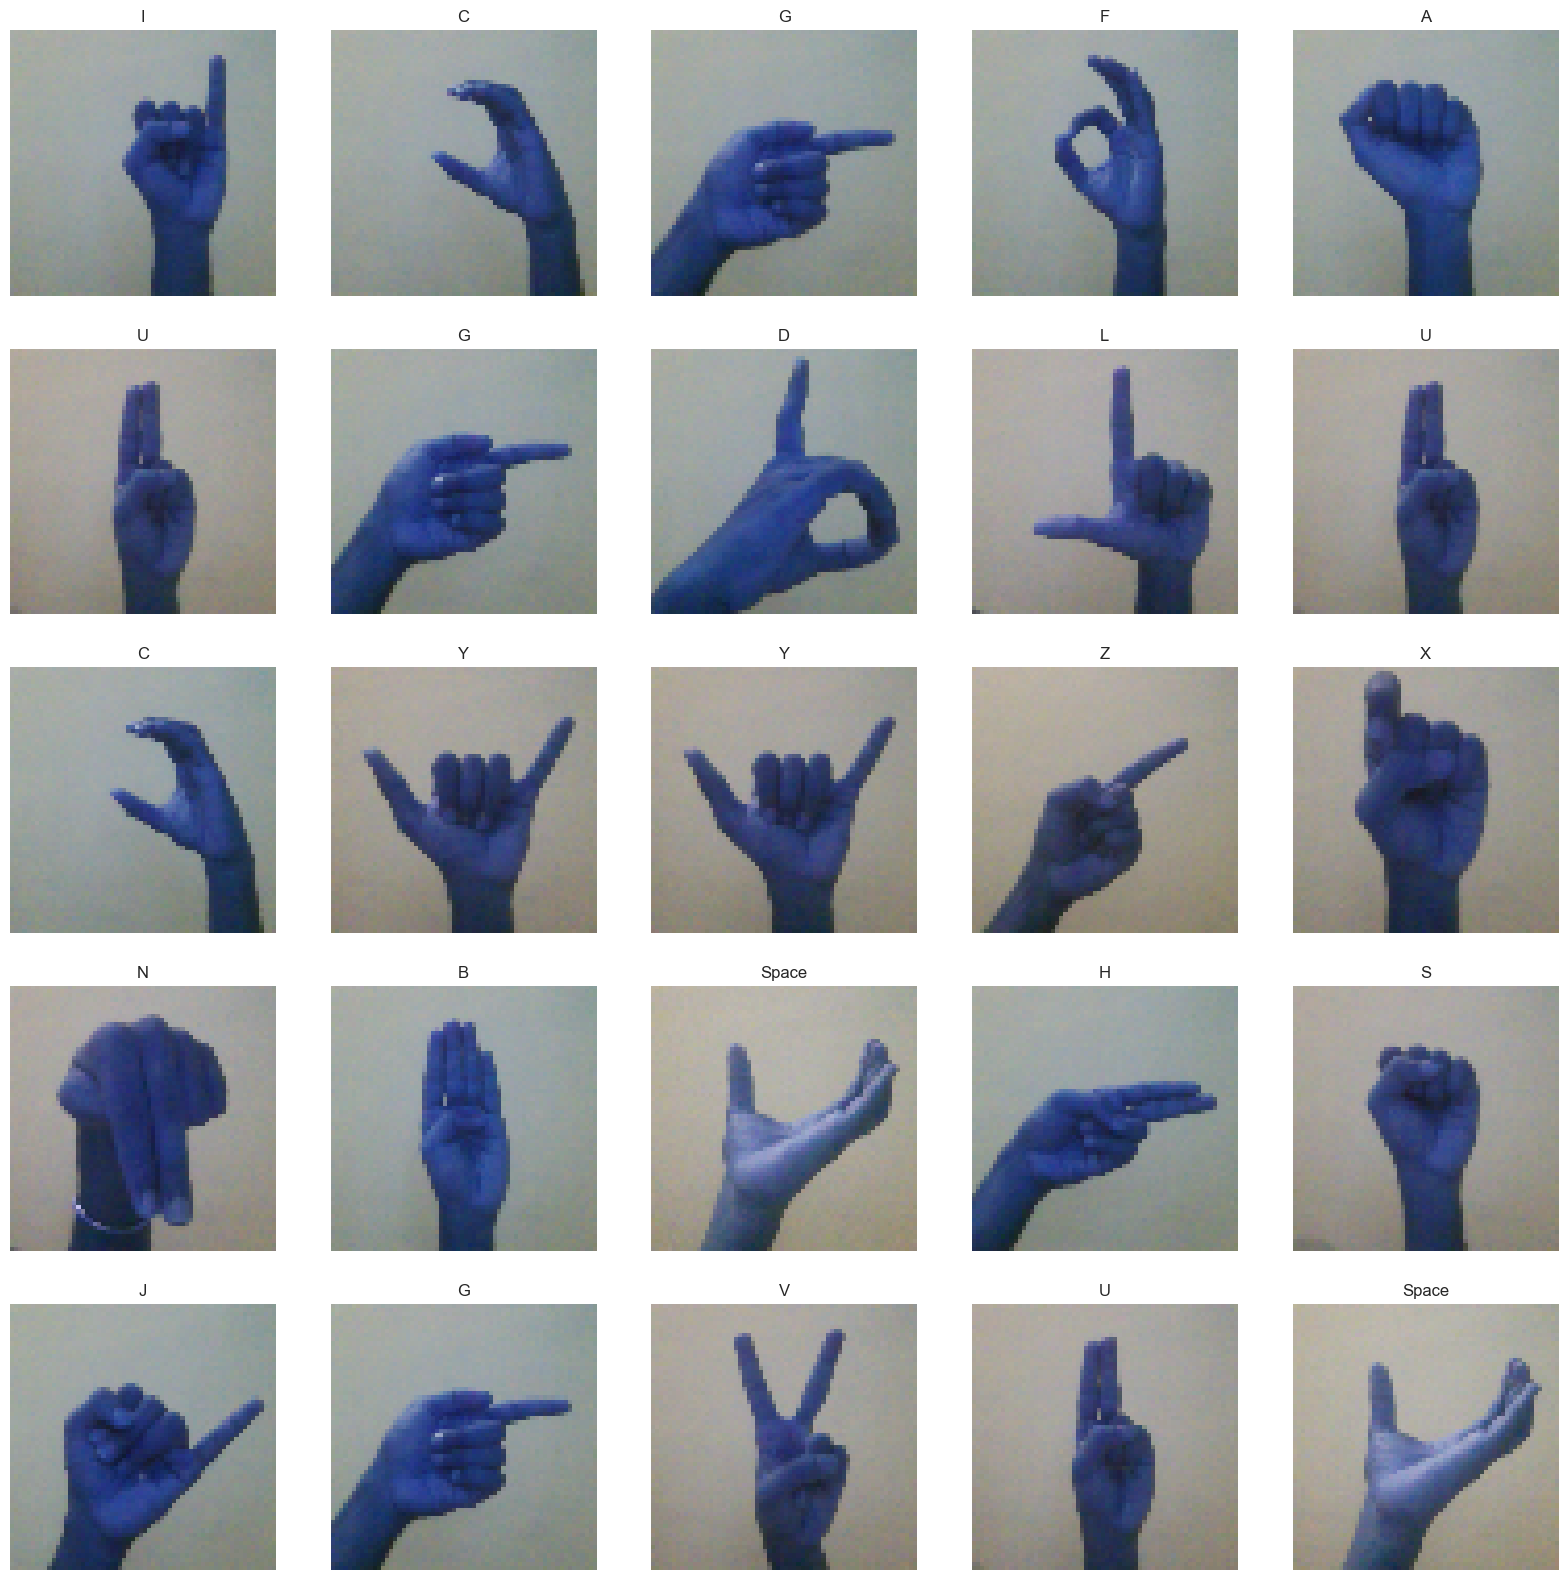

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Pred),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(X_Pred[i])    
    plt.axis('off')
    plt.title(getcode(y_Pred[i]))

Split Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_Data, y_Data, test_size = 0.20, random_state =42)

In [16]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

X_Pred = np.array(X_Pred)
y_Pred=np.array(y_Pred)

In [17]:
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_Pred shape  is {X_Pred.shape}')


print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'y_Pred shape  is {y_Pred.shape}')

X_train shape  is (132536, 64, 64, 3)
X_test shape  is (33134, 64, 64, 3)
X_Pred shape  is (112, 64, 64, 3)
y_train shape  is (132536,)
y_test shape  is (33134,)
y_Pred shape  is (112,)


Modeling

In [20]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(img_size,img_size,3)),
        keras.layers.MaxPool2D(4,4),
        Dropout(0.25),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),    
        keras.layers.MaxPool2D(4,4),
        
        keras.layers.Flatten() ,    
        keras.layers.Dense(128,activation='relu') ,    
        Dropout(0.25),
        keras.layers.Dense(28,activation='softmax') ,    
        ])

In [21]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None,

In [23]:
ThisModel = KerasModel.fit(X_train, y_train, epochs=5,verbose=1,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/5
2071/2071 [==============================] - 481s 230ms/step - loss: 0.7575 - accuracy: 0.7943 - val_loss: 0.0310 - val_accuracy: 0.9906
Epoch 2/5
2071/2071 [==============================] - 433s 209ms/step - loss: 0.0725 - accuracy: 0.9760 - val_loss: 0.0034 - val_accuracy: 0.9988
Epoch 3/5
2071/2071 [==============================] - 420s 203ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 4/5
2071/2071 [==============================] - 412s 199ms/step - loss: 0.0410 - accuracy: 0.9883 - val_loss: 0.0040 - val_accuracy: 0.9987
Epoch 5/5
2071/2071 [==============================] - 413s 199ms/step - loss: 0.0406 - accuracy: 0.9890 - val_loss: 0.0024 - val_accuracy: 0.9995


Evaluation

In [24]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1036/1036 [==============================] - 34s 32ms/step - loss: 0.0024 - accuracy: 0.9995
Test Loss is 0.0023644790053367615
Test Accuracy is 0.9995473027229309


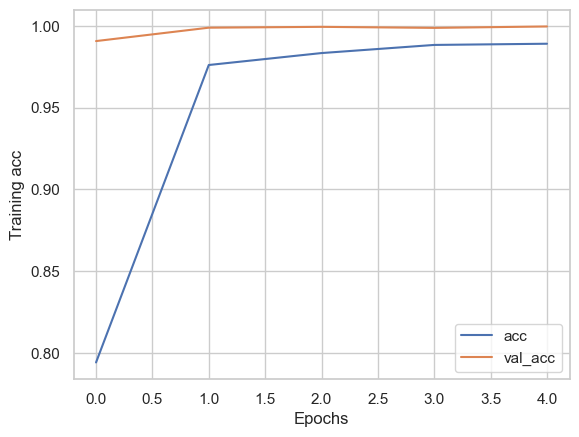

<Figure size 640x480 with 0 Axes>

In [25]:

plt.plot(ThisModel.history['accuracy'], label='acc')
plt.plot(ThisModel.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Training acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")


In [26]:
KerasModel.save('sign.keras')

In [ ]:
# model = keras.models.load_model("sign.keras")

In [27]:
import random

random.shuffle(X_Pred)

In [28]:
y_try =KerasModel.predict(X_Pred)

4/4 [==============================] - 1s 32ms/step


In [ ]:
np.argmax(y_try[0])

G


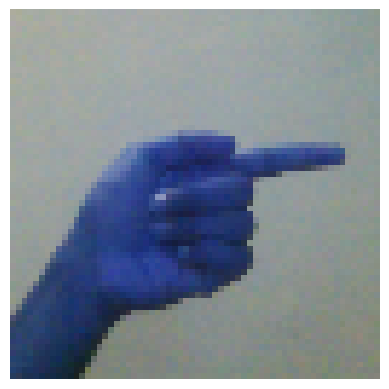

I


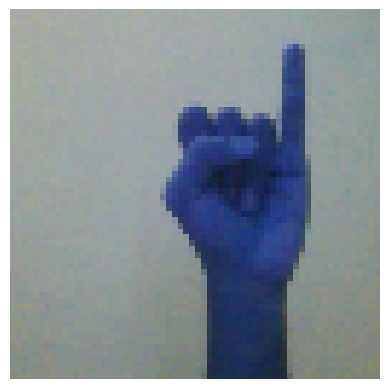

I


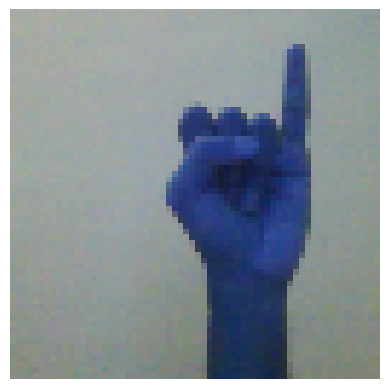

P


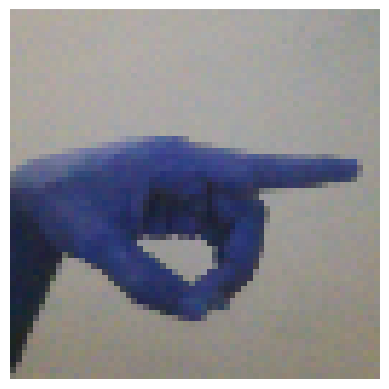

B


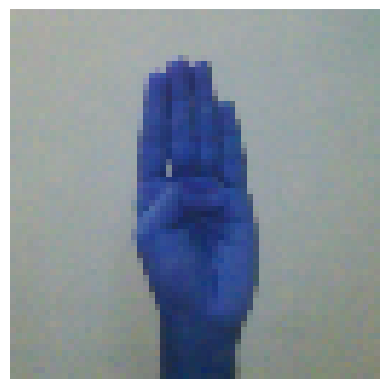

S


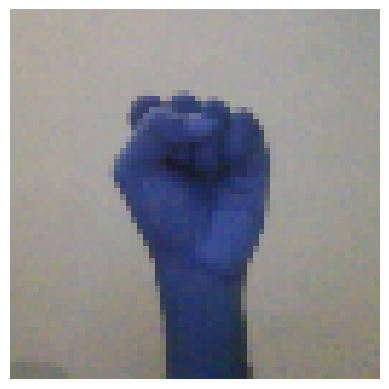

A


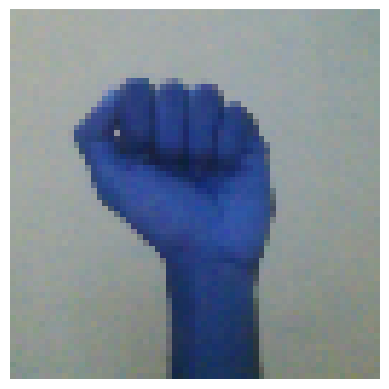

I


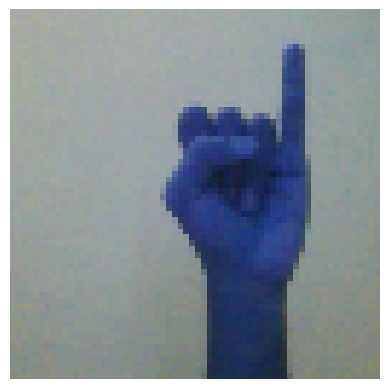

I


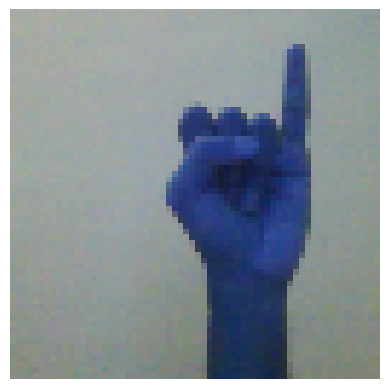

E


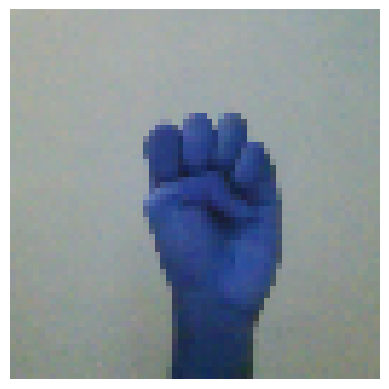

In [29]:

for i in range(10):
    j =np.random.randint(0,len(X_Pred))
    print(getcode(np.argmax(y_try[j])))
    plt.imshow(X_Pred[j] ,cmap= plt.cm.gray)
    plt.axis('off')
    plt.show()


In [ ]:
# i =0
# for i in range(10):
#     j=int(np.random.randint(0,len(X_Pred),10))
#     print(getcode(np.argmax(y_try[j])))
#     plt.imshow(X_Pred[j] ,cmap= plt.cm.binary)
#     plt.show()

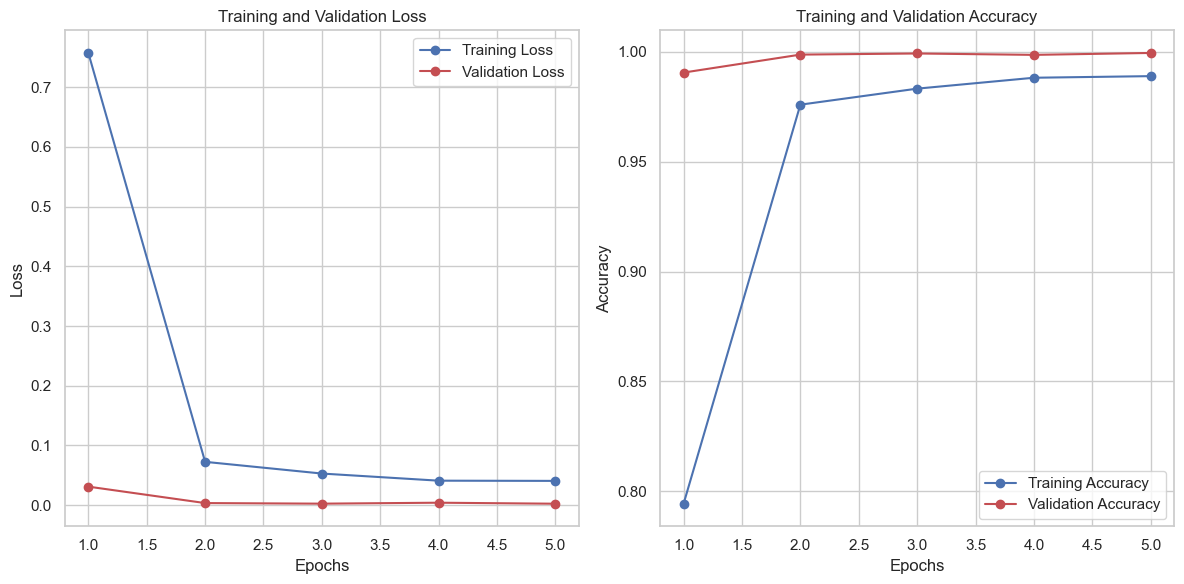

In [33]:
import matplotlib.pyplot as plt

train_loss = ThisModel.history['loss']
val_loss = ThisModel.history['val_loss']
train_acc = ThisModel.history['accuracy']
val_acc = ThisModel.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



In [34]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = KerasModel.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)



conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


1036/1036 [==============================] - 33s 31ms/step
Confusion Matrix:
[[1163    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1152    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1172    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1157    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 1175    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1266    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1206    0    0    0  

In [36]:
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=code.keys()))

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1163
           B       1.00      1.00      1.00      1152
           C       1.00      1.00      1.00      1172
           D       1.00      1.00      1.00      1158
           E       1.00      1.00      1.00      1175
           F       1.00      1.00      1.00      1266
           G       1.00      1.00      1.00      1206
           H       1.00      1.00      1.00      1229
           I       1.00      1.00      1.00      1185
           J       1.00      1.00      1.00      1182
           K       1.00      1.00      1.00      1199
           L       1.00      1.00      1.00      1189
           M       1.00      1.00      1.00      1262
           N       1.00      1.00      1.00      1181
     Nothing       1.00      1.00      1.00      1159
           O       1.00      1.00      1.00      1149
           P       1.00      1.00      1.00      1265
    

1036/1036 [==============================] - 31s 30ms/step


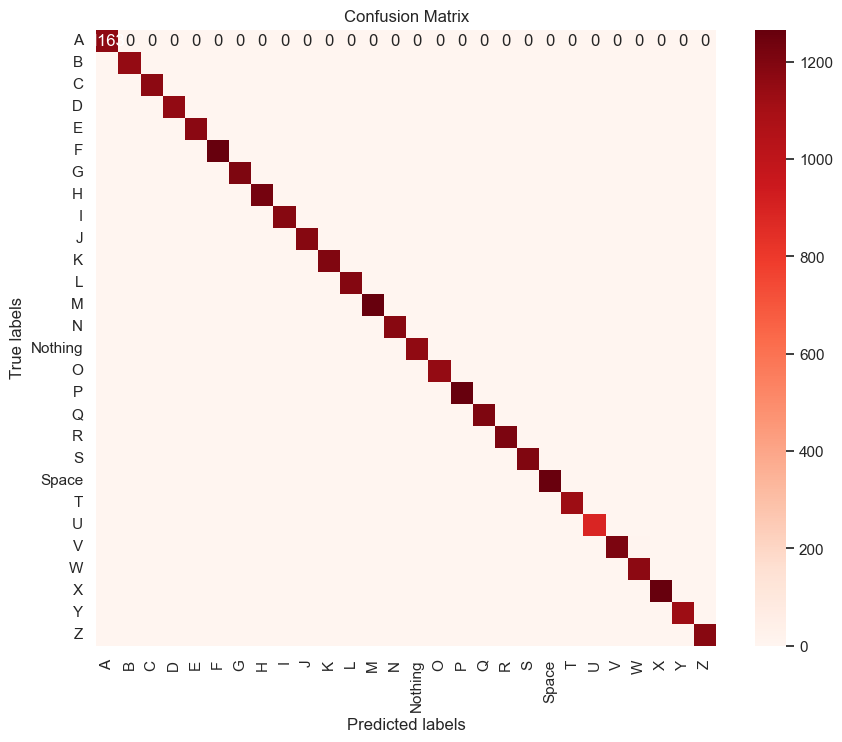

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = KerasModel.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=code.keys(), yticklabels=code.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


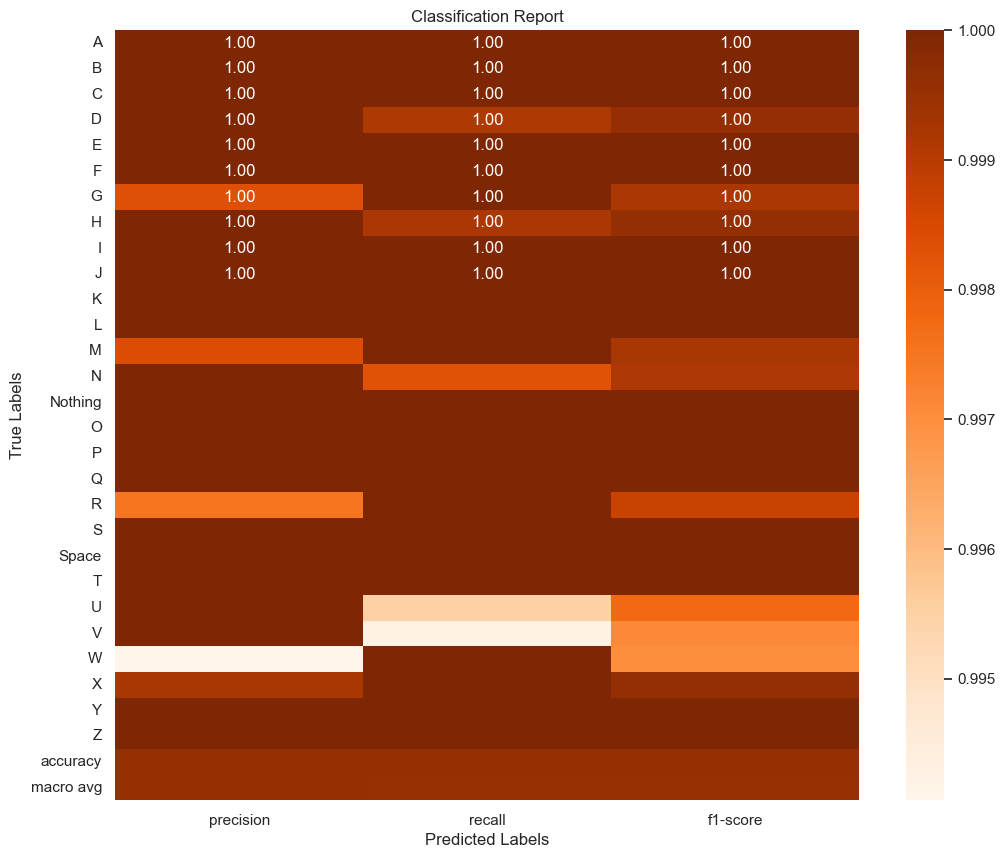

In [38]:
import seaborn as sns
from sklearn.metrics import classification_report

class_labels = [getcode(i) for i in range(28)]

class_report = classification_report(y_test, y_pred_classes, target_names=class_labels, output_dict=True)

df_class_report = pd.DataFrame(class_report).transpose()

plt.figure(figsize=(12, 10))
sns.heatmap(df_class_report.iloc[:-1, :-1], annot=True, cmap='Oranges', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_classes)

class_labels = [getcode(i) for i in range(28)]

bar_width = 0.4
index = np.arange(len(class_labels))


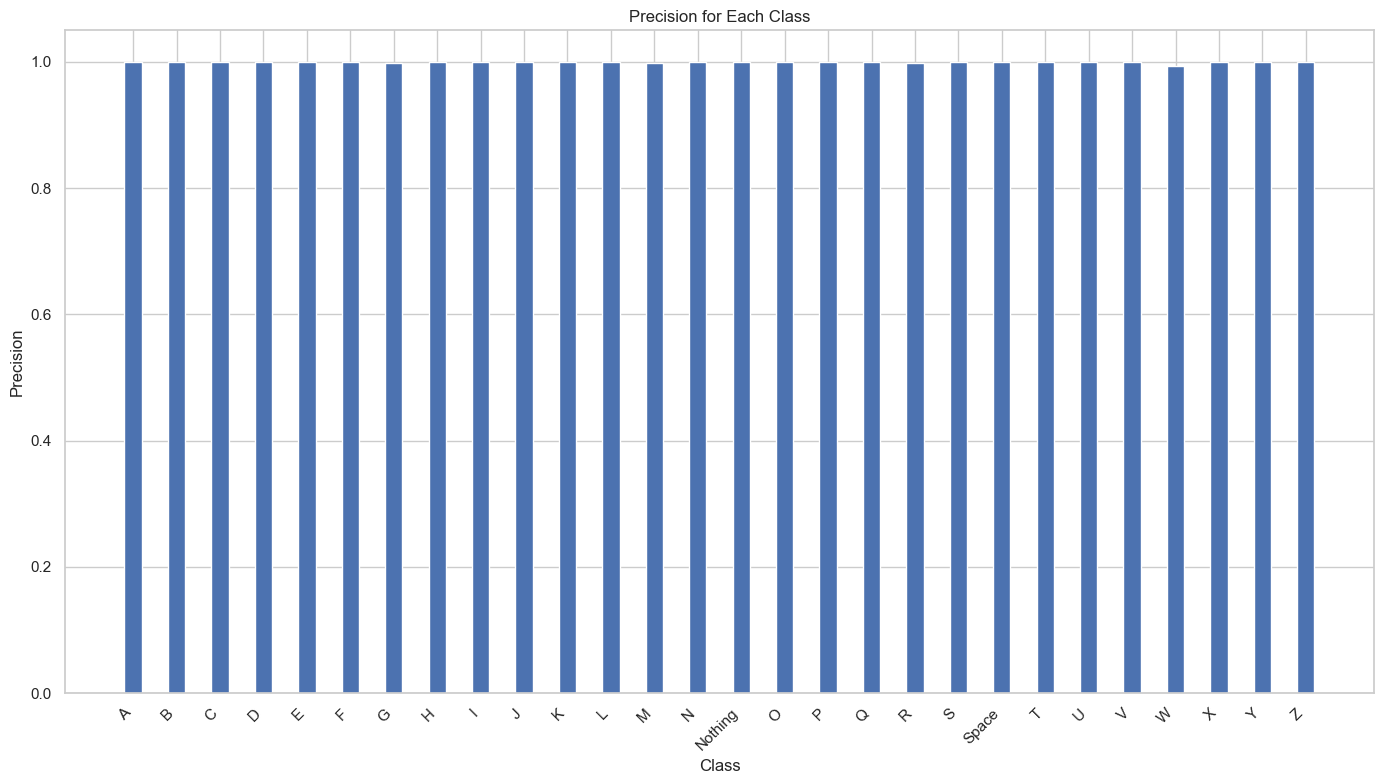

In [40]:
# Plot precision for each class
plt.figure(figsize=(14, 8))
plt.bar(index, precision, bar_width, label='Precision')
plt.title('Precision for Each Class')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.xticks(index, class_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()


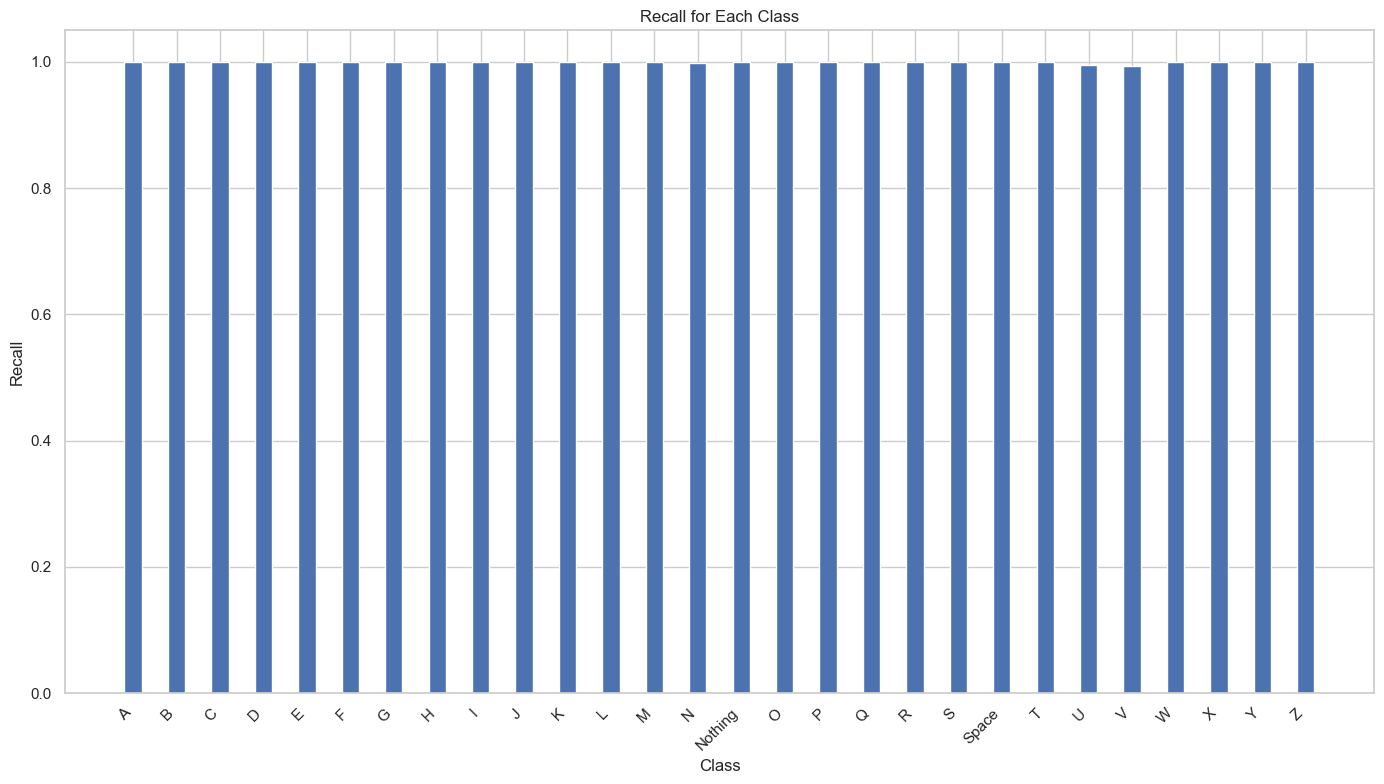

In [41]:
# Plot recall for each class
plt.figure(figsize=(14, 8))
plt.bar(index, recall, bar_width, label='Recall')
plt.title('Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.xticks(index, class_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()


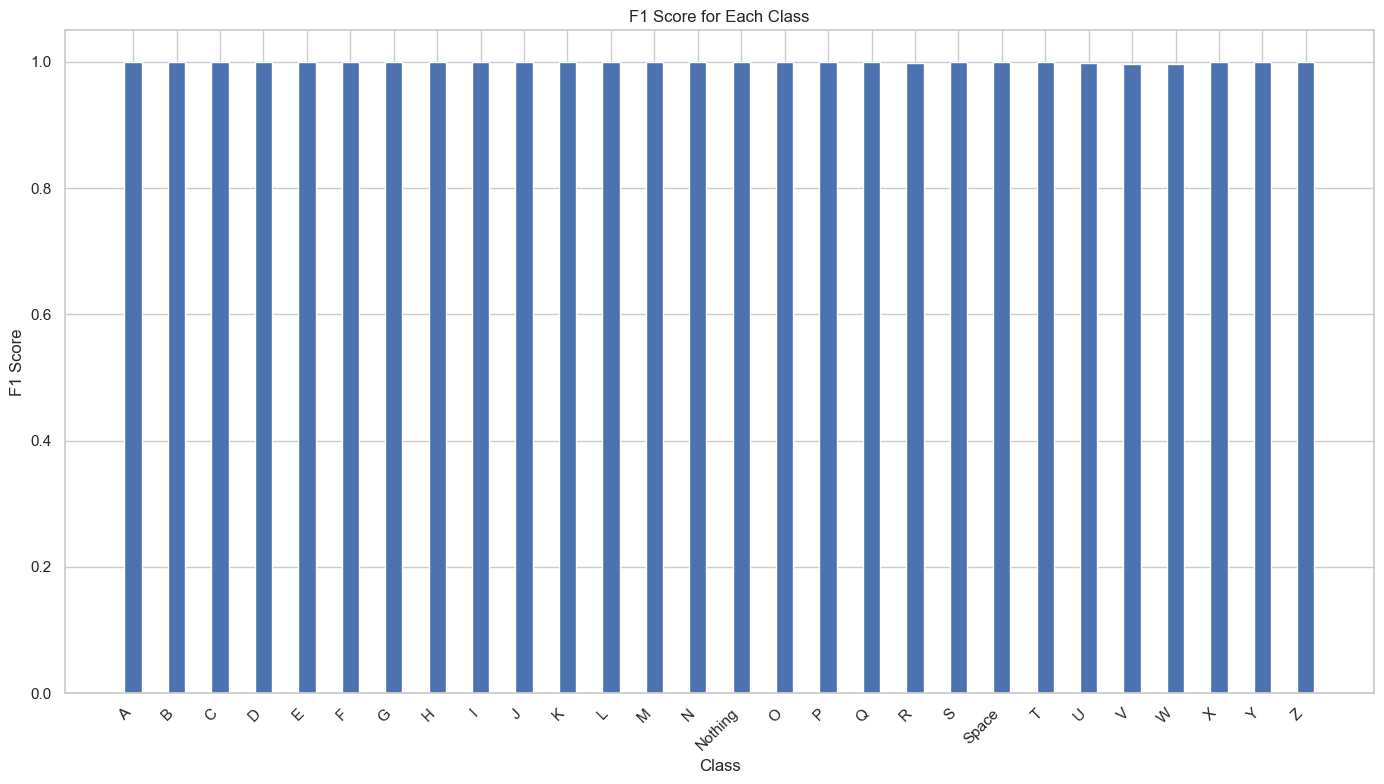

In [42]:
# Plot F1 score for each class
plt.figure(figsize=(14, 8))
plt.bar(index, f1_score, bar_width, label='F1 Score')
plt.title('F1 Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.xticks(index, class_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()


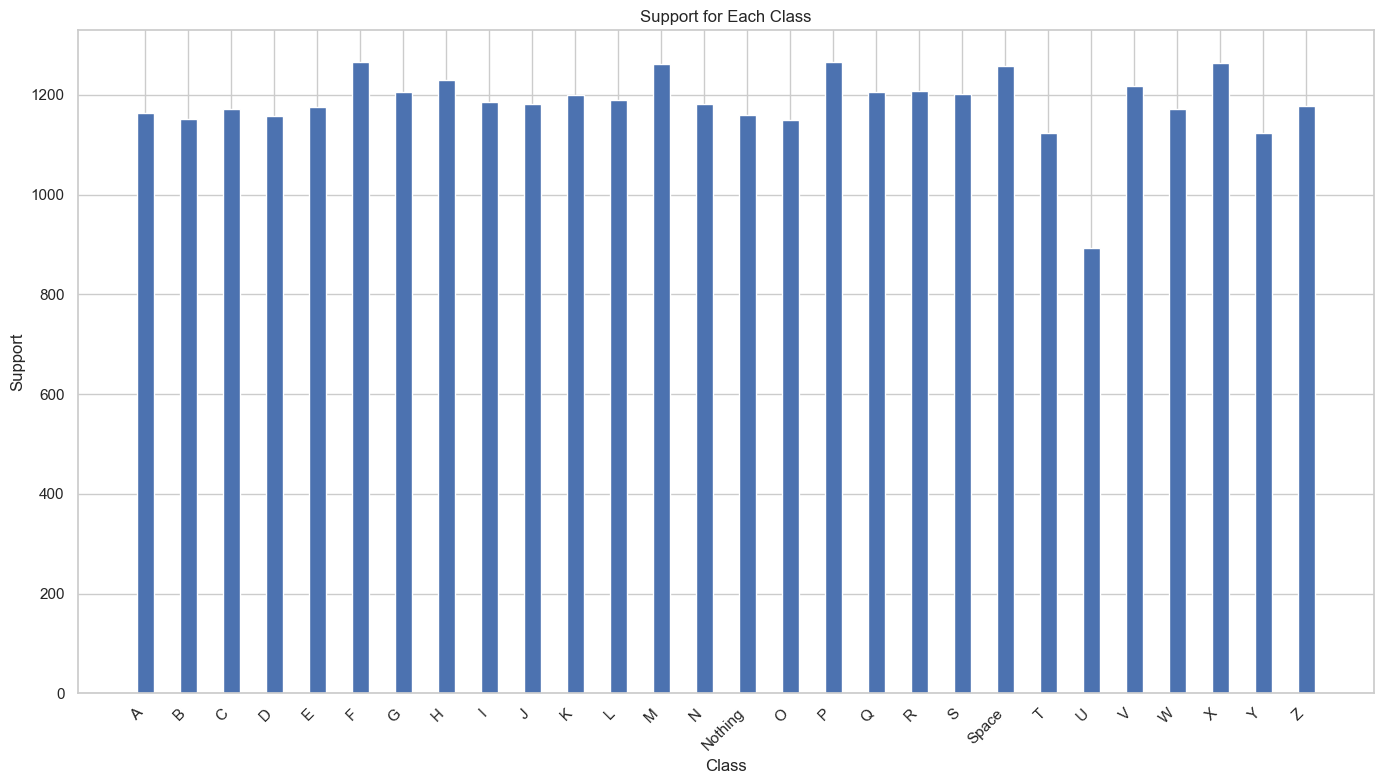

In [43]:
# Plot support for each class
plt.figure(figsize=(14, 8))
plt.bar(index, support, bar_width, label='Support')
plt.title('Support for Each Class')
plt.xlabel('Class')
plt.ylabel('Support')
plt.xticks(index, class_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

